# Exploring Movie Preferences: An Analysis of the Movielens 25M Dataset

### Importing necessary datasets

In [1]:
import pandas as pd
import numpy as np

df_1 = pd.read_csv("C:/Users/Harvey/Downloads/genome-tags.csv")
df_2 = pd.read_csv("C:/Users/Harvey/Downloads/genome-scores.csv")
df_3 = pd.read_csv("C:/Users/Harvey/Downloads/links.csv")
df_4 = pd.read_csv("C:/Users/Harvey/Downloads/movies.csv")
df_5 = pd.read_csv("C:/Users/Harvey/Downloads/tags.csv")
df_6 = pd.read_csv("C:/Users/Harvey/Downloads/ratings.csv")



### Identifying key information about the datasets

In [2]:
display(df_1.columns)
display(df_2.columns)
display(df_3.columns)
display(df_4.columns)
display(df_5.columns)
display(df_6.columns)

        
df_1 = df_1.drop_duplicates()
df_2 = df_2.drop_duplicates()
df_3 = df_3.drop_duplicates()
df_4 = df_4.drop_duplicates()
df_5 = df_5.drop_duplicates()
df_6 = df_6.drop_duplicates()
        
display(df_1.shape)
display(df_2.shape)
display(df_3.shape)
display(df_4.shape)
display(df_5.shape)
display(df_6.shape)


#df_1 = pd.read_csv("/genome-tags.csv")
#df_2 = pd.read_csv("/genome-scores.csv")
#df_3 = pd.read_csv("/links.csv")
#df_4 = pd.read_csv("/movies.csv")
#df_5 = pd.read_csv("/tags.csv")
#df_6 = pd.read_csv("/ratings.csv")

Index(['tagId', 'tag'], dtype='object')

Index(['movieId', 'tagId', 'relevance'], dtype='object')

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

Index(['movieId', 'title', 'genres'], dtype='object')

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

(1128, 2)

(15584448, 3)

(62423, 3)

(62423, 3)

(1093360, 4)

(25000095, 4)

### No change in cell shape after dropping duplicates implies that there are no duplicates in the datasets.

## How many movies are released each year? What is the percentage of change over time?

### Merging two of the datasets with time values

In [3]:
df_merged = pd.merge(df_5, df_6, how="outer")

### Identifying key information about the merge

In [4]:
print(df_merged["timestamp"].count())
print(f"Number of NaN values in timestamp is {df_merged['timestamp'].isna().sum()}")
print(f"Ratio of NaN values to valid values is {df_merged['timestamp'].isna().sum()/df_merged['timestamp'].count()}")

26093348
Number of NaN values in timestamp is 0
Ratio of NaN values to valid values is 0.0


In [5]:
#df_merged.dropna( inplace=True)


### Adding a specific column for a date time formate from timestamp

In [6]:
import datetime
df_merged["datetime"] = df_merged["timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x))

### Displaying key information about the merge

In [7]:
df_merged = df_merged.sort_values(by='datetime', ascending=True)
print(df_merged.tail(10))
display(df_merged.shape)

#Dropping duplicate movies
df_merged.drop_duplicates(subset=['movieId'], inplace=True)
display(df_merged.shape)

          userId  movieId  tag   timestamp  rating            datetime
14301159   85523    59315  NaN  1574327393     4.0 2019-11-21 17:09:53
14301178   85523   122912  NaN  1574327399     4.5 2019-11-21 17:09:59
14301161   85523    60069  NaN  1574327406     4.5 2019-11-21 17:10:06
14301191   85523   195165  NaN  1574327424     3.0 2019-11-21 17:10:24
14301174   85523   109487  NaN  1574327445     4.5 2019-11-21 17:10:45
14301186   85523   168252  NaN  1574327479     4.0 2019-11-21 17:11:19
2377862     8642   202101  NaN  1574327512     2.0 2019-11-21 17:11:52
14301199   85523   204704  NaN  1574327533     4.0 2019-11-21 17:12:13
2377818     8642   122914  NaN  1574327549     4.0 2019-11-21 17:12:29
14301183   85523   149406  NaN  1574327703     4.5 2019-11-21 17:15:03


(26093348, 6)

(62423, 6)

### Extracting year values from each row and displaying key information for the new dataframe

In [8]:
from datetime import datetime

df_merged["date_year"] = df_merged["datetime"].dt.year
display(df_merged.head(10))

yearly_movies = df_merged.groupby('date_year')[['movieId']].count()
print(df_merged["date_year"].unique())
print(yearly_movies)
print(df_merged.shape)

,userId,movieId,tag,timestamp,rating,datetime,date_year
1420168,2262,1079,NaN,789652009,3.0,1995-01-09 19:46:49,1995
1420125,2262,47,NaN,789652009,5.0,1995-01-09 19:46:49,1995
1420119,2262,21,NaN,789652009,3.0,1995-01-09 19:46:49,1995
7728162,42937,32,NaN,822873600,5.0,1996-01-29 08:00:00,1996
16938306,102689,1,NaN,822873600,4.0,1996-01-29 08:00:00,1996
20324602,124805,10,NaN,822873600,3.0,1996-01-29 08:00:00,1996
20324603,124805,11,NaN,822873600,4.0,1996-01-29 08:00:00,1996
20324607,124805,45,NaN,822873600,5.0,1996-01-29 08:00:00,1996
20324608,124805,58,NaN,822873600,5.0,1996-01-29 08:00:00,1996
12125744,71732,19,NaN,822873600,1.0,1996-01-29 08:00:00,1996


[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
           movieId
date_year         
1995             3
1996          1380
1997           290
1998           665
1999           755
2000           834
2001           973
2002           944
2003          1147
2004          1298
2005           584
2006           372
2007           426
2008           918
2009          1928
2010          2175
2011          2051
2012          1686
2013          1836
2014          2461
2015          7764
2016          7542
2017          7756
2018         10600
2019          6035
(62423, 7)


### Adding another column for better visualization

In [9]:
yearly_movies = pd.DataFrame(yearly_movies)
yearly_movies = yearly_movies.reset_index()
yearly_movies["movieId_count"] = yearly_movies["movieId"]
yearly_movies["movieId_count_million"] = yearly_movies["movieId"]/1000000
yearly_movies.columns

Index(['date_year', 'movieId', 'movieId_count', 'movieId_count_million'], dtype='object')

### Plotting movies released yearly

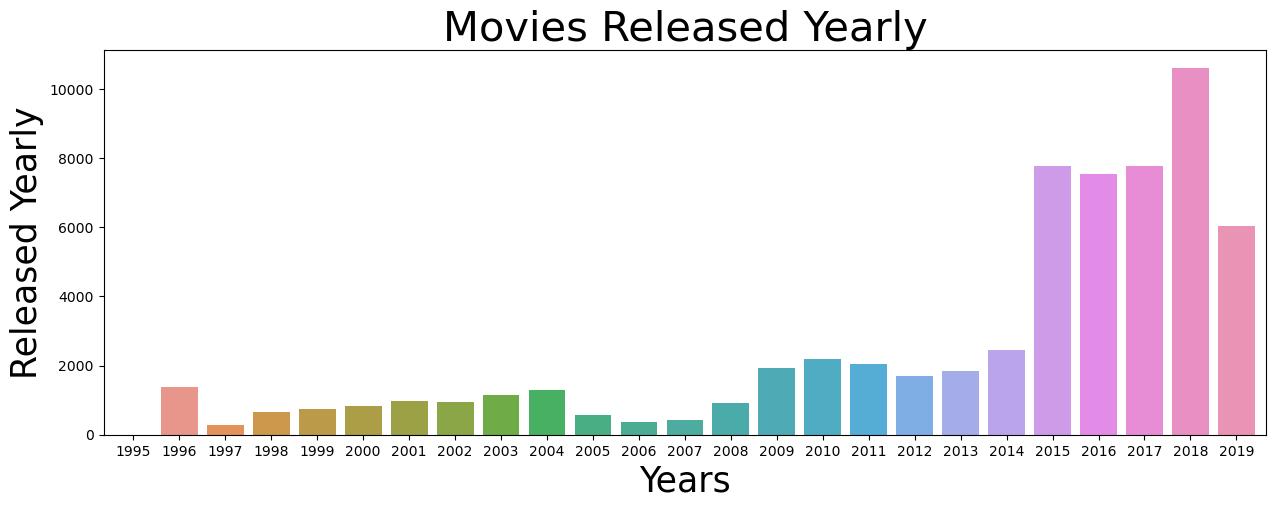

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
yearly_movies = pd.DataFrame(yearly_movies)
sns.barplot(x='date_year', y="movieId_count", data = yearly_movies)

plt.margins(x=0.01)
plt.title("Movies Released Yearly", fontsize=30)
plt.xlabel("Years", fontsize=25)
plt.ylabel("Released Yearly", fontsize=25)

# Display the plot
plt.show()

### Identifying key information about the new dataset to be used

In [11]:
yearly_movies["percent_increase"] = yearly_movies["movieId"].pct_change()
yearly_movies["percent_increase"] = yearly_movies["percent_increase"]*100
yearly_movies.columns
display(yearly_movies.head(10))
print(yearly_movies.shape)

,date_year,movieId,movieId_count,movieId_count_million,percent_increase
0,1995,3,3,0.000003,NaN
1,1996,1380,1380,0.001380,45900.000000
2,1997,290,290,0.000290,-78.985507
3,1998,665,665,0.000665,129.310345
4,1999,755,755,0.000755,13.533835
5,2000,834,834,0.000834,10.463576
6,2001,973,973,0.000973,16.666667
7,2002,944,944,0.000944,-2.980473
8,2003,1147,1147,0.001147,21.504237
9,2004,1298,1298,0.001298,13.164778


(25, 5)


### Plotting increase in movies released yearly

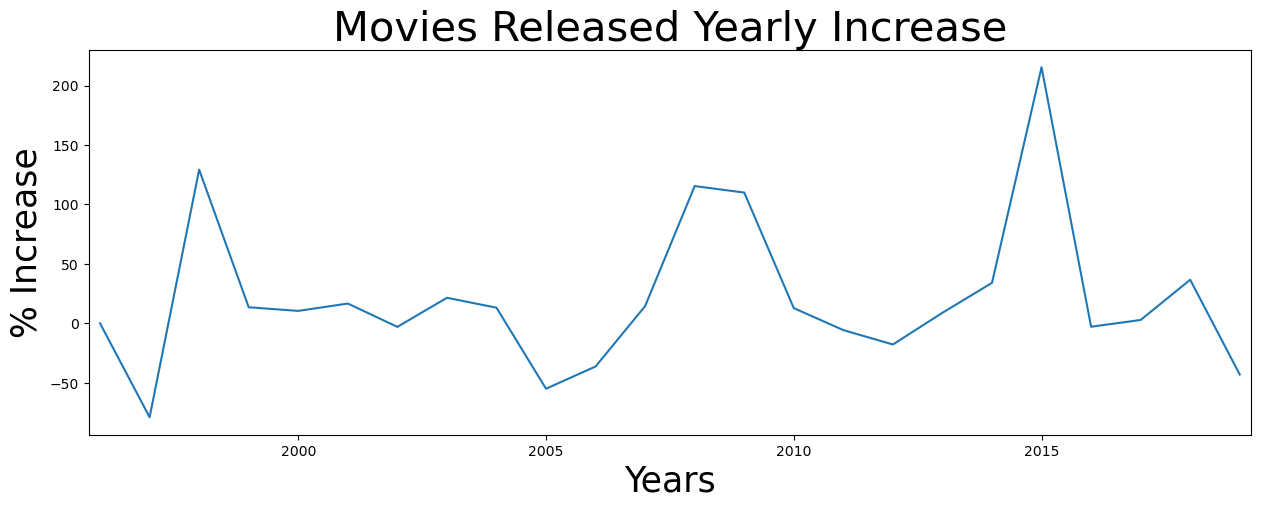

In [12]:
plt.figure(figsize=(15,5))
yearly_movies = pd.DataFrame(yearly_movies)
yearly_movies.loc[1,"percent_increase"] = 0
sns.lineplot(x='date_year', y="percent_increase", data = yearly_movies)

plt.margins(x=0.01)
plt.title("Movies Released Yearly Increase", fontsize=30)
plt.xlabel("Years", fontsize=25)
plt.ylabel("% Increase", fontsize=25)

# Display the plot
plt.show()

## What are the most popular genre of movies?

In [13]:
display(df_4.head(10))
print(df_4["genres"].unique())

display(df_4.shape)
#Dropping duplicate titles
df_4_unique_titles = df_4.drop_duplicates(subset=['title'])
display(df_4_unique_titles.shape)

genre_popularity = df_4_unique_titles['genres'].value_counts()

genre_popularity = pd.DataFrame(genre_popularity)
top_10_genre = genre_popularity.iloc[0:9]
display(genre_popularity.head(10))
display(top_10_genre)
print(top_10_genre.columns)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Children|Comedy|Fantasy|Mystery' 'Children|Comedy|Crime|Fantasy'
 'Comedy|Horror|Mystery|Sci-Fi|Western']


(62423, 3)

(62325, 3)

,genres
Drama,9040
Comedy,5664
(no genres listed),5052
Documentary,4723
Comedy|Drama,2383
Drama|Romance,2125
Horror,1653
Comedy|Romance,1575
Comedy|Drama|Romance,1042
Drama|Thriller,930


,genres
Drama,9040
Comedy,5664
(no genres listed),5052
Documentary,4723
Comedy|Drama,2383
Drama|Romance,2125
Horror,1653
Comedy|Romance,1575
Comedy|Drama|Romance,1042


Index(['genres'], dtype='object')


### Plotting the top 10 movie genres

Text(0, 0.5, 'Number of Movies Released')

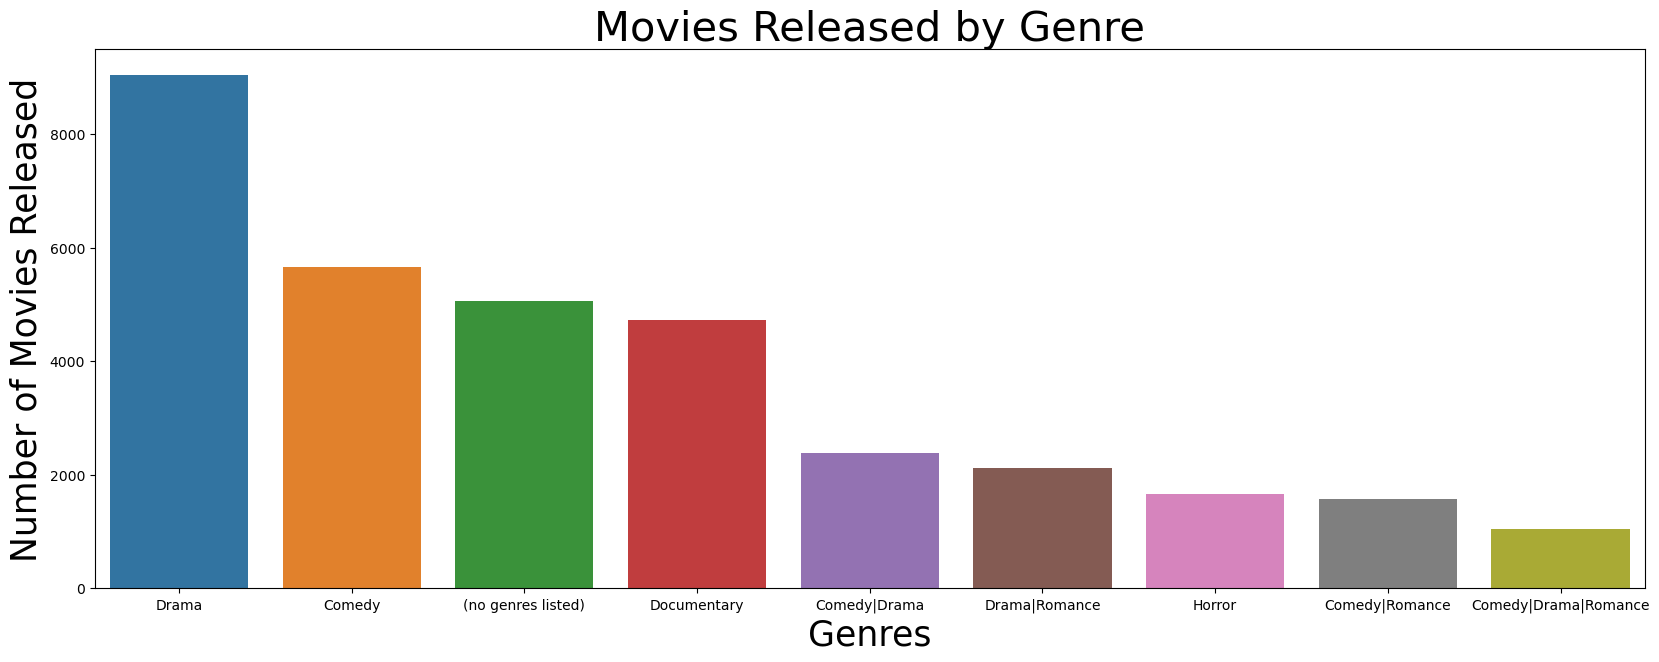

In [14]:
plt.figure(figsize=(20,7))
sns.barplot(x=top_10_genre.index, y="genres", data = top_10_genre)

plt.margins(x=0.01)
plt.title("Movies Released by Genre", fontsize=30)
plt.xlabel("Genres", fontsize=25)            
plt.ylabel("Number of Movies Released", fontsize=25)

## Does the taste of movies changes over time?

In [15]:
import re

df_4_unique_titles["title"] = df_4_unique_titles["title"].astype(str)

df_4_unique_titles["movie_year"] = df_4_unique_titles["title"].str.extract(r"\((\d{4})\)$", expand=False)
df_4_unique_titles['movie_year'] = df_4_unique_titles['movie_year'].fillna('0')
df_4_unique_titles["movie_year"] = df_4_unique_titles["movie_year"].astype(int)

display(df_4_unique_titles.tail(10))
display(df_4_unique_titles["movie_year"].unique)

most_common_genres = df_4_unique_titles.groupby("movie_year")["genres"].apply(lambda x: x.str.split("|").explode().mode()[0])
most_common_genres = pd.DataFrame(most_common_genres)

display(most_common_genres)

C:\Users\Harvey\AppData\Local\Temp\ipykernel_23704\4164633456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_unique_titles["title"] = df_4_unique_titles["title"].astype(str)
C:\Users\Harvey\AppData\Local\Temp\ipykernel_23704\4164633456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_unique_titles["movie_year"] = df_4_unique_titles["title"].str.extract(r"\((\d{4})\)$", expand=False)
C:\Users\Harvey\AppData\Local\Temp\ipykernel_23704\4164633456.py:6: SettingWithCopyWarning: 
A value is tryi

,movieId,title,genres,movie_year
62413,209145,Liberté (2019),Drama,2019
62414,209147,The Carpet of Horror (1962),Crime|Horror,1962
62415,209151,Mao Zedong 1949 (2019),(no genres listed),2019
62416,209153,Happy Flight (2008),Comedy|Drama,2008
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,2008
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


<bound method Series.unique of 0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
62418    2018
62419    2001
62420    2018
62421    2001
62422    1962
Name: movie_year, Length: 62325, dtype: int32>

,genres
movie_year,
0,(no genres listed)
1874,Documentary
1878,(no genres listed)
1880,Documentary
1883,(no genres listed)
...,...
2015,Drama
2016,Drama
2017,Drama


Text(0, 0.5, 'Most popular genre')

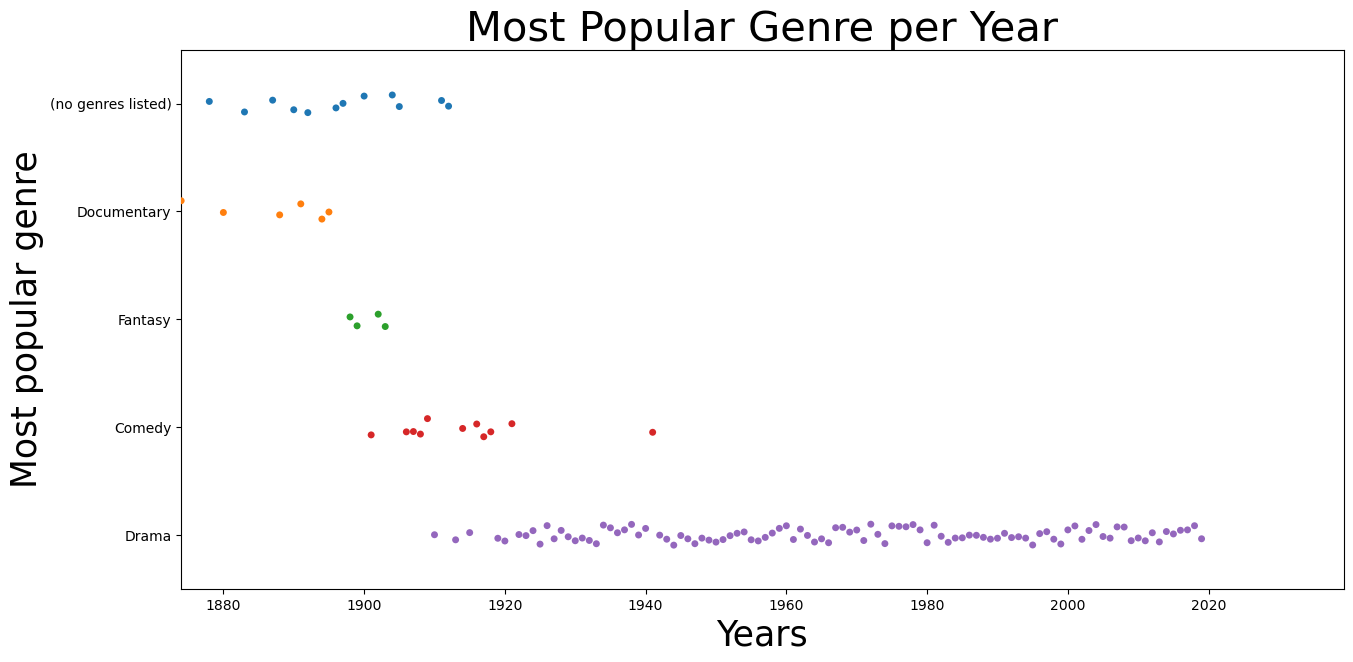

In [16]:
yearly_movies.loc[1,"count"] = 0
plt.figure(figsize=(15,7))
sns.stripplot(x=most_common_genres.index, y='genres', data = most_common_genres)

plt.margins(x=0.01)
plt.xlim(1874,)
plt.title("Most Popular Genre per Year", fontsize=30)
plt.xlabel("Years", fontsize=25)            
plt.ylabel("Most popular genre", fontsize=25)

## What are the top 20 movies that has the top amount of users rating and has the highest rate?

In [17]:
display(df_4.head(10))
display(df_6.head(10))
merged_df = pd.merge(df_4,df_6, how='inner', on='movieId')
#display(merged_df.head(10))
#display(merged_df.columns)

display(merged_df.shape)
#Dropping duplicate titles
df_merged.drop_duplicates(subset=['timestamp'], inplace=True)
display(merged_df.shape)

ratings_count = merged_df.groupby('title')['rating'].count()
ratings_mean = merged_df.groupby('title')['rating'].mean()

sorted_ratings_count = ratings_count.sort_values(ascending=False)
top_sorted_ratings_count = sorted_ratings_count.iloc[0:20]

top_sorted_ratings_count_frame = pd.DataFrame(top_sorted_ratings_count)
ratings_mean_frame = pd.DataFrame(ratings_mean)

merged_df2 = pd.merge(top_sorted_ratings_count_frame,ratings_mean_frame, how='inner', on='title')

# Display the top 20 most rated movies
#display(top_sorted_ratings_count_frame)

ratings_average = top_sorted_ratings_count_frame.mean()
display(merged_df2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


(25000095, 6)

(25000095, 6)

,rating_x,rating_y
title,,
Forrest Gump (1994),81491,4.048011
"Shawshank Redemption, The (1994)",81482,4.413576
Pulp Fiction (1994),79672,4.188912
"Silence of the Lambs, The (1991)",74127,4.151342
"Matrix, The (1999)",72674,4.154099
Star Wars: Episode IV - A New Hope (1977),68717,4.120189
Jurassic Park (1993),64144,3.679175
Schindler's List (1993),60411,4.247579
Braveheart (1995),59184,4.002273


In [18]:
merged_df2_sorted = merged_df2.sort_values('rating_y', ascending=False)
display(merged_df2_sorted)

,rating_x,rating_y
title,,
"Shawshank Redemption, The (1994)",81482,4.413576
"Godfather, The (1972)",52498,4.324336
"Usual Suspects, The (1995)",55366,4.284353
Schindler's List (1993),60411,4.247579
Fight Club (1999),58773,4.228311
Pulp Fiction (1994),79672,4.188912
"Matrix, The (1999)",72674,4.154099
"Silence of the Lambs, The (1991)",74127,4.151342
Star Wars: Episode V - The Empire Strikes Back (1980),57361,4.144122


### Plotting top 20 most rated movies according to their average rating

(3.5, 5.0)

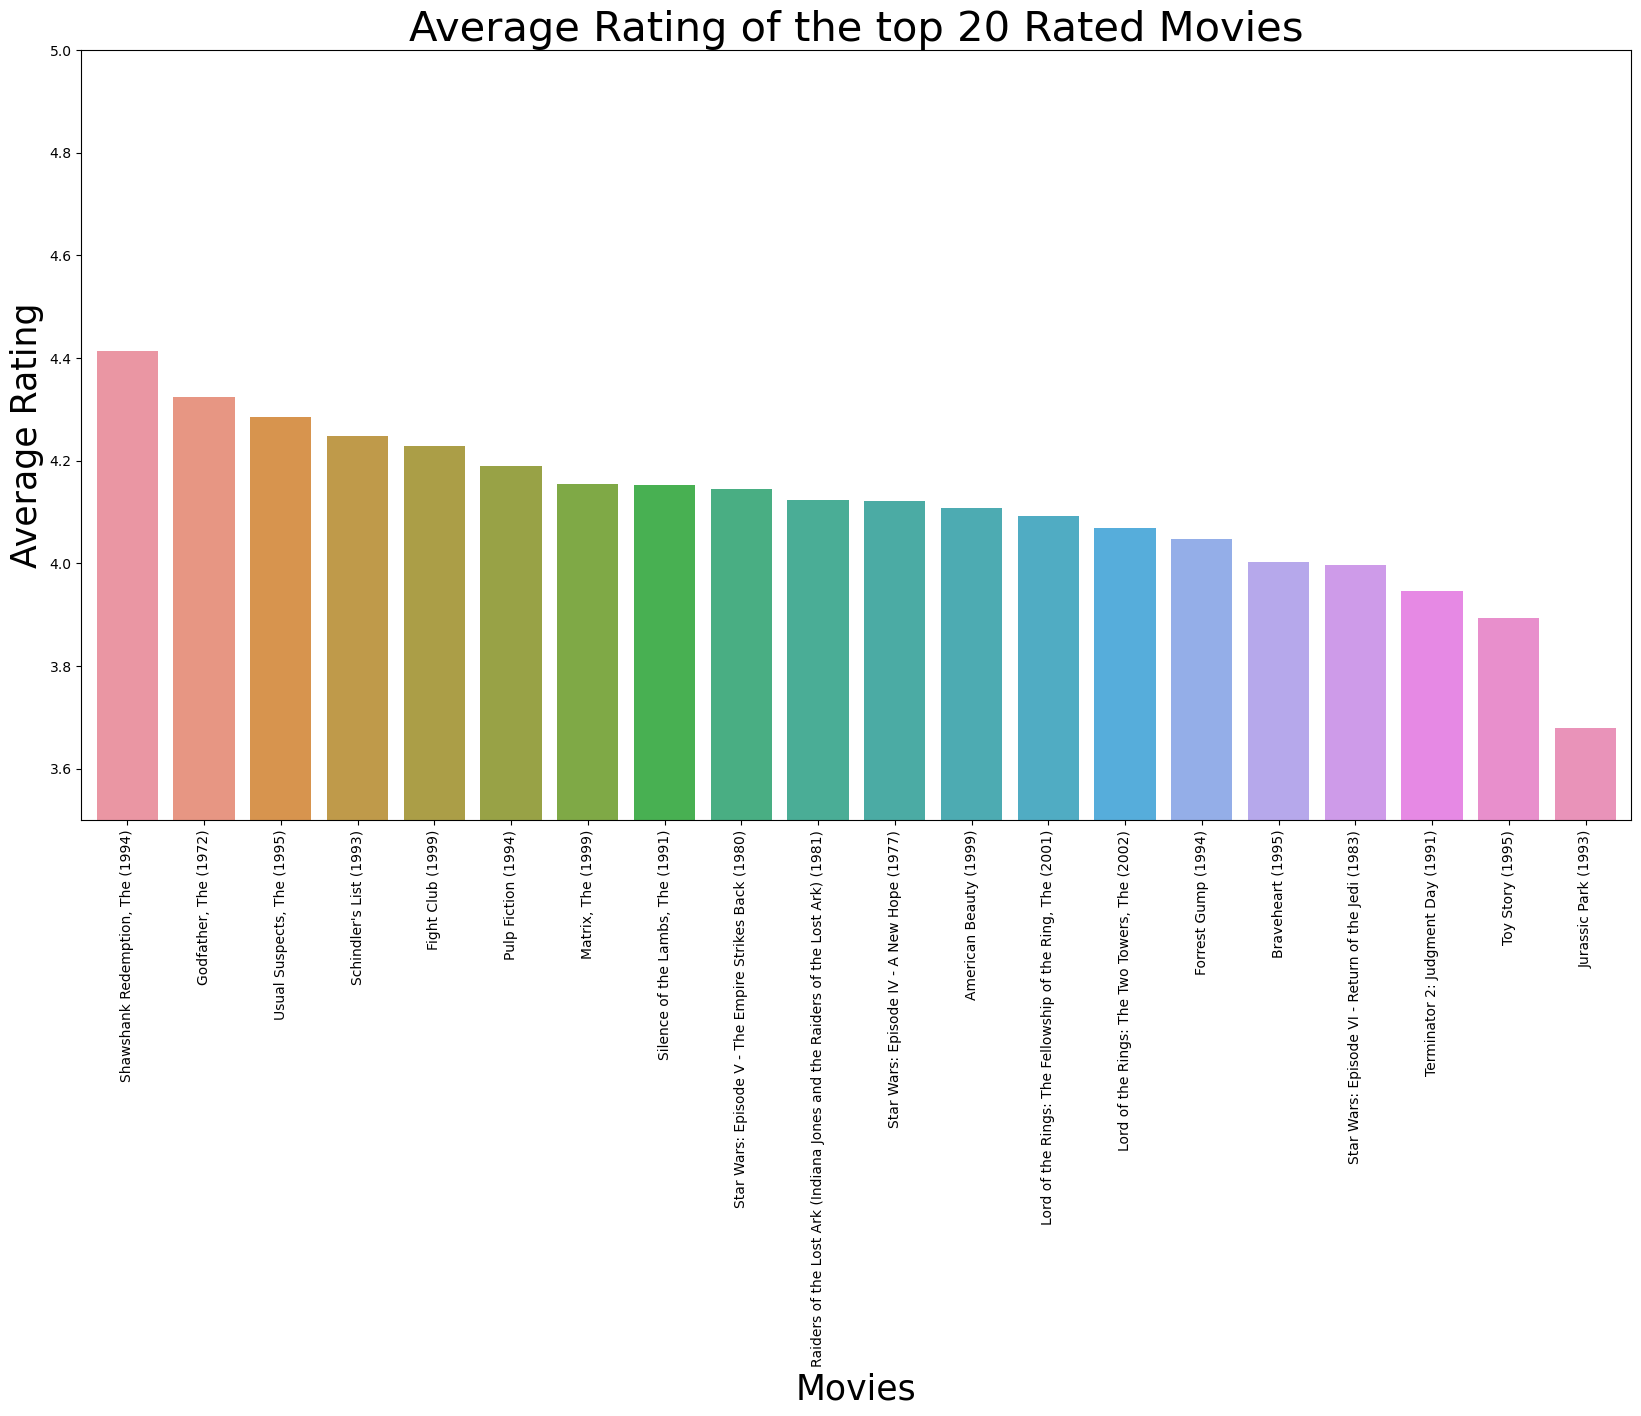

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=merged_df2_sorted.index, y='rating_y', data = merged_df2_sorted)

plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.title("Average Rating of the top 20 Rated Movies", fontsize=30)
plt.xlabel("Movies", fontsize=25)            
plt.ylabel("Average Rating", fontsize=25)
plt.ylim(3.5,5)

## What is the most of popular season for releasing movies?

In [20]:
df_merged.head(10)

,userId,movieId,tag,timestamp,rating,datetime,date_year
1420168,2262,1079,NaN,789652009,3.0,1995-01-09 19:46:49,1995
7728162,42937,32,NaN,822873600,5.0,1996-01-29 08:00:00,1996
3775338,17794,64,NaN,823185212,3.0,1996-02-01 22:33:32,1996
3775337,17794,63,NaN,823185213,1.0,1996-02-01 22:33:33,1996
3775336,17794,62,NaN,823185214,4.0,1996-02-01 22:33:34,1996
3775325,17794,44,NaN,823185215,3.0,1996-02-01 22:33:35,1996
3775327,17794,46,NaN,823185216,3.0,1996-02-01 22:33:36,1996
3775303,17794,16,NaN,823185221,4.0,1996-02-01 22:33:41,1996
3775307,17794,20,NaN,823185223,3.0,1996-02-01 22:33:43,1996
3775292,17794,5,NaN,823185224,2.0,1996-02-01 22:33:44,1996


In [21]:
import datetime

df_merged["timestamp"] = pd.to_datetime(df_merged['timestamp'], unit='s')
df_merged['month'] = df_merged['timestamp'].dt.month
df_merged.head(10)

,userId,movieId,tag,timestamp,rating,datetime,date_year,month
1420168,2262,1079,NaN,1995-01-09 11:46:49,3.0,1995-01-09 19:46:49,1995,1
7728162,42937,32,NaN,1996-01-29 00:00:00,5.0,1996-01-29 08:00:00,1996,1
3775338,17794,64,NaN,1996-02-01 14:33:32,3.0,1996-02-01 22:33:32,1996,2
3775337,17794,63,NaN,1996-02-01 14:33:33,1.0,1996-02-01 22:33:33,1996,2
3775336,17794,62,NaN,1996-02-01 14:33:34,4.0,1996-02-01 22:33:34,1996,2
3775325,17794,44,NaN,1996-02-01 14:33:35,3.0,1996-02-01 22:33:35,1996,2
3775327,17794,46,NaN,1996-02-01 14:33:36,3.0,1996-02-01 22:33:36,1996,2
3775303,17794,16,NaN,1996-02-01 14:33:41,4.0,1996-02-01 22:33:41,1996,2
3775307,17794,20,NaN,1996-02-01 14:33:43,3.0,1996-02-01 22:33:43,1996,2
3775292,17794,5,NaN,1996-02-01 14:33:44,2.0,1996-02-01 22:33:44,1996,2


### Extracting the month values from timestamp and converting it to word in months

In [22]:
months_initial = df_merged['month'].unique()
df_merged['month'] = df_merged['month'].astype(str)
print(months_initial)
months_final = {'1': "January", '2': "February", '3': "March", '4': "April", '5': "May", '6': "June", '7': "July", '8': "August",
 '9': "September", '10': "October", '11': "November", '12': "December"}

df_merged['month'] = df_merged['month'].replace(months_final)
months_final = df_merged['month'].unique()
print(months_final)

monthly_movies = df_merged.groupby('month')[['movieId']].count()
display(monthly_movies)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


,movieId
month,
April,3940
August,4318
December,4008
February,4643
January,4824
July,4525
June,4278
March,4444
May,8811


In [23]:
monthly_movies_sorted = monthly_movies.sort_values('movieId', ascending=False)
monthly_movies_sorted["released_in_millions"] = monthly_movies_sorted["movieId"]/1000000
display(monthly_movies_sorted)

,movieId,released_in_millions
month,,
May,8811,0.008811
January,4824,0.004824
October,4672,0.004672
February,4643,0.004643
November,4553,0.004553
July,4525,0.004525
March,4444,0.004444
August,4318,0.004318
June,4278,0.004278


### Plotting the most popular season according to months in releasing movies

Text(0, 0.5, 'Number of Movies Released')

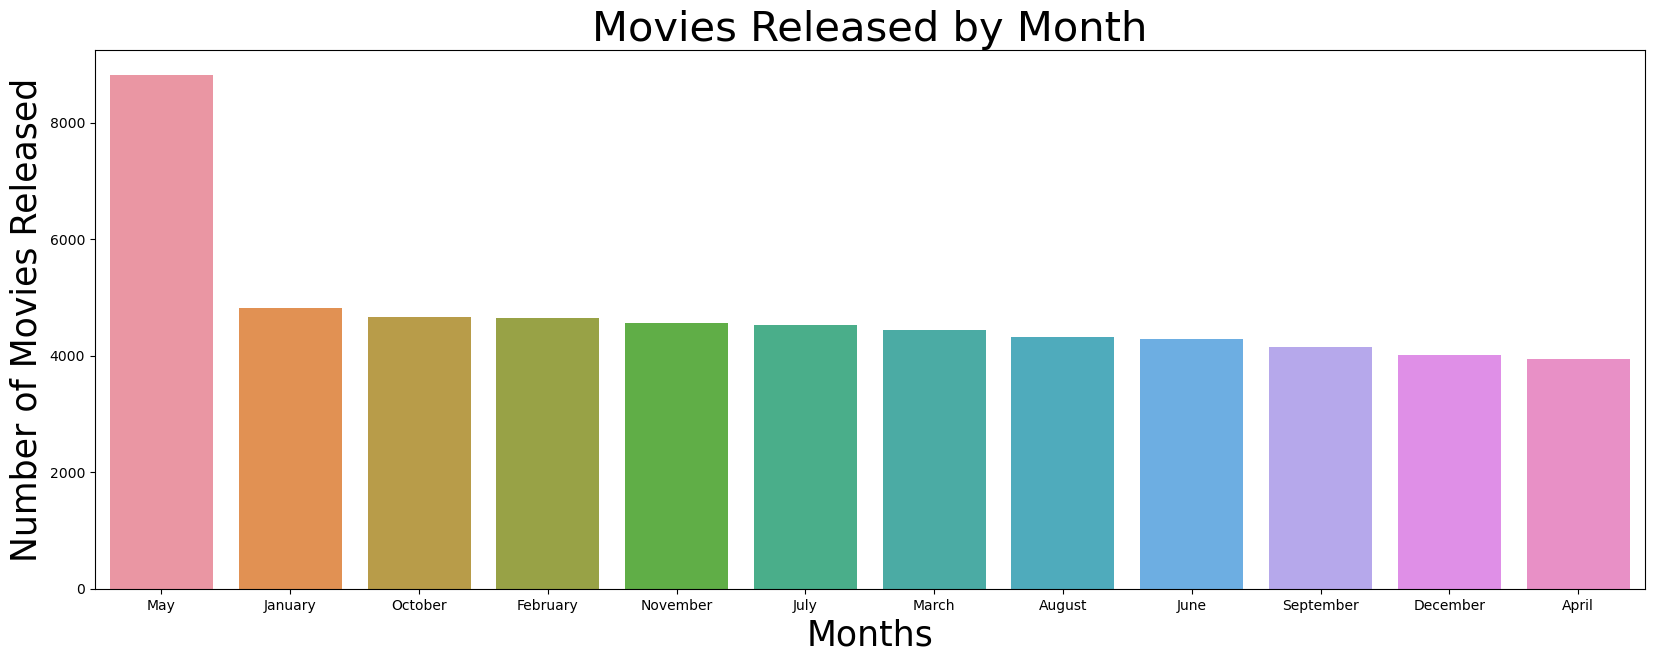

In [25]:
plt.figure(figsize=(20,7))
sns.barplot(x=monthly_movies_sorted.index, y="movieId", data = monthly_movies_sorted)

plt.margins(x=0.01)
plt.title("Movies Released by Month", fontsize=30)
plt.xlabel("Months", fontsize=25)            
plt.ylabel("Number of Movies Released", fontsize=25)
#plt.ylim(1.5,3)